In [60]:
from pandas import DataFrame, concat

df1 = DataFrame({'이름': ['영희','철수'], '국어': [87,91]})
df1

,이름,국어
0,영희,87
1,철수,91


In [2]:
df2 = DataFrame({'이름': ['민철', '수현'], '국어': [78, 92]})
df2

,이름,국어
0,민철,78
1,수현,92


In [3]:
concat([df1,df2])

,이름,국어
0,영희,87
1,철수,91
0,민철,78
1,수현,92


In [4]:
인덱스_재구성df = concat([df1, df2])
인덱스_재구성df.reset_index(inplace=True, drop=True)
인덱스_재구성df

,이름,국어
0,영희,87
1,철수,91
2,민철,78
3,수현,92


In [5]:
concat([df1,df2], ignore_index=True)

,이름,국어
0,영희,87
1,철수,91
2,민철,78
3,수현,92


In [7]:
df3 = DataFrame({'이름': ['영희','철수'], '국어': [87,91]})
df3

,이름,국어
0,영희,87
1,철수,91


In [8]:
df4 = DataFrame({'이름': ['민철','수현'], '수학': [78,92]})
df4

,이름,수학
0,민철,78
1,수현,92


In [9]:
concat([df3, df4], ignore_index=True)

,이름,국어,수학
0,영희,87.0,NaN
1,철수,91.0,NaN
2,민철,NaN,78.0
3,수현,NaN,92.0


In [10]:
df5 = DataFrame({'국어': [87, 91, 85]},
                index = ['영희', '철수','민수'])
df5

,국어
영희,87
철수,91
민수,85


In [11]:
df6 = DataFrame({'국어': [78,92,82]},
                index = ['민철','수현','민수'])
df6

,국어
민철,78
수현,92
민수,82


In [12]:
concat([df5, df6])

,국어
영희,87
철수,91
민수,85
민철,78
수현,92
민수,82


In [13]:
concat([df5, df6], ignore_index = True)

,국어
0,87
1,91
2,85
3,78
4,92
5,82


나는야 IT쇼핑몰 Gemini Mall의 신입 데이터 분석가(가 되고싶다.)

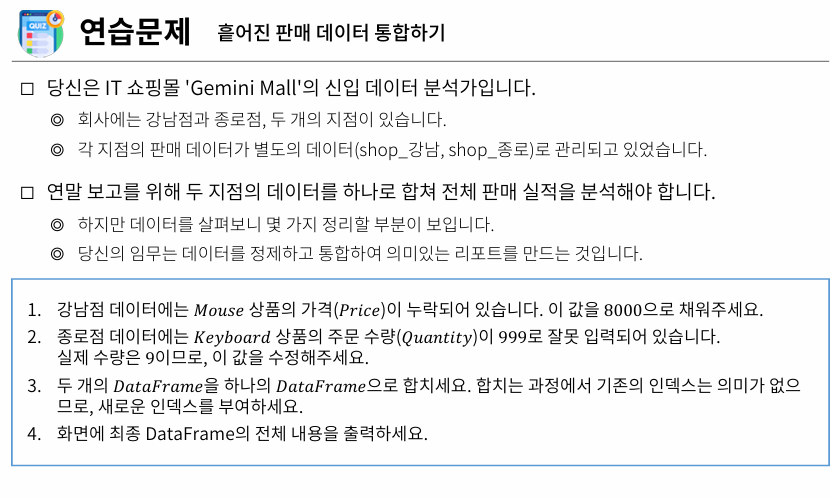

In [25]:
from hossam import load_data
origin_강남 = load_data('shop_강남')
# origin_강남.head()
origin_강남.info()


[data] https://data.hossam.kr/data/lab04/shop_강남.xlsx
[desc] 흩어진 판매 데이터 통합하기(인덱스/메타데이터 없음)
[!] Cannot read metadata
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OrderID   4 non-null      object 
 1   Product   4 non-null      object 
 2   Quantity  4 non-null      int64  
 3   Price     3 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ bytes


In [46]:
origin_종로 = load_data('shop_종로')
# origin_종로.head()
origin_종로.info()

[data] https://data.hossam.kr/data/lab04/shop_종로.xlsx
[desc] 흩어진 판매 데이터 통합하기(인덱스/메타데이터 없음)
[!] Cannot read metadata
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OrderID   4 non-null      object
 1   Product   4 non-null      object
 2   Quantity  4 non-null      int64 
 3   Price     4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes


In [ ]:
강남nan처리 = origin_강남.fillna(value=8000)
강남nan처리

,OrderID,Product,Quantity,Price
0,A001,Keyboard,10,15000.0
1,A002,Mouse,20,8000.0
2,A003,Monitor,5,75000.0
3,A004,Keyboard,12,15000.0


In [ ]:
종로점999처리 = origin_종로.copy()
종로점999처리['Quantity'] = 종로점999처리['Quantity'].replace(999,9)
종로점999처리

,OrderID,Product,Quantity,Price
0,B001,Mouse,15,8000
1,B002,Keyboard,9,14500
2,B003,Webcam,10,30000
3,B004,Mouse,18,8000


In [61]:
merged_shop = concat([강남nan처리, 종로점999처리], ignore_index=True)
merged_shop

,OrderID,Product,Quantity,Price
0,A001,Keyboard,10,15000.0
1,A002,Mouse,20,8000.0
2,A003,Monitor,5,75000.0
3,A004,Keyboard,12,15000.0
4,B001,Mouse,15,8000.0
5,B002,Keyboard,9,14500.0
6,B003,Webcam,10,30000.0
7,B004,Mouse,18,8000.0
